In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(4340, 8)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
print(df["seller_type"].unique())
print(df["fuel"].unique())
print(df["transmission"].unique())
print(df["owner"].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
print(df["seller_type"].value_counts())
print(df["fuel"].value_counts())
print(df["transmission"].value_counts())
print(df["owner"].value_counts())

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [7]:
final_dataset = df.drop("name", axis = 1)
final_dataset.drop(final_dataset[final_dataset['fuel']=='Electric'].index,axis=0,inplace=True)
final_dataset.drop(final_dataset[final_dataset['owner']=='Test Drive Car'].index,axis=0,inplace=True)

In [8]:
final_dataset.shape

(4322, 7)

In [9]:
final_dataset["car_Age"] = 2020 - final_dataset["year"]

In [10]:
final_dataset.drop(["year"],axis = 1, inplace=True)

In [11]:
final_dataset['no_of_previous_owners'] = final_dataset['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,"Fourth & Above":4})

In [12]:
final_dataset = final_dataset.dropna()

In [13]:
final_dataset['no_of_previous_owners'] = final_dataset['no_of_previous_owners'].astype(int)

In [14]:
final_dataset.drop(['owner'], axis=1, inplace=True)

In [15]:
final_dataset.head(10)

,selling_price,km_driven,fuel,seller_type,transmission,car_Age,no_of_previous_owners
0,60000,70000,Petrol,Individual,Manual,13,1
1,135000,50000,Petrol,Individual,Manual,13,1
2,600000,100000,Diesel,Individual,Manual,8,1
3,250000,46000,Petrol,Individual,Manual,3,1
4,450000,141000,Diesel,Individual,Manual,6,2
5,140000,125000,Petrol,Individual,Manual,13,1
6,550000,25000,Petrol,Individual,Manual,4,1
7,240000,60000,Petrol,Individual,Manual,6,2
8,850000,25000,Petrol,Individual,Manual,5,1
9,365000,78000,CNG,Individual,Manual,3,1


In [16]:
final_dataset.drop(final_dataset[final_dataset['seller_type']=='Trustmark Dealer'].index,axis=0,inplace=True)

In [17]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [18]:
final_dataset.shape

(4139, 9)

In [19]:
final_dataset.head()

,selling_price,km_driven,car_Age,no_of_previous_owners,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual
0,60000,70000,13,1,0,0,1,1,1
1,135000,50000,13,1,0,0,1,1,1
2,600000,100000,8,1,1,0,0,1,1
3,250000,46000,3,1,0,0,1,1,1
4,450000,141000,6,2,1,0,0,1,1


## Looking for Correlation

In [20]:
#Dependence of target with every variable (ranging from -1 to 1)
corr_matrix = final_dataset.corr()
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price             1.000000
fuel_Diesel               0.283564
fuel_LPG                 -0.041272
km_driven                -0.183230
no_of_previous_owners    -0.208968
seller_type_Individual   -0.212143
fuel_Petrol              -0.271217
car_Age                  -0.405629
transmission_Manual      -0.523463
Name: selling_price, dtype: float64

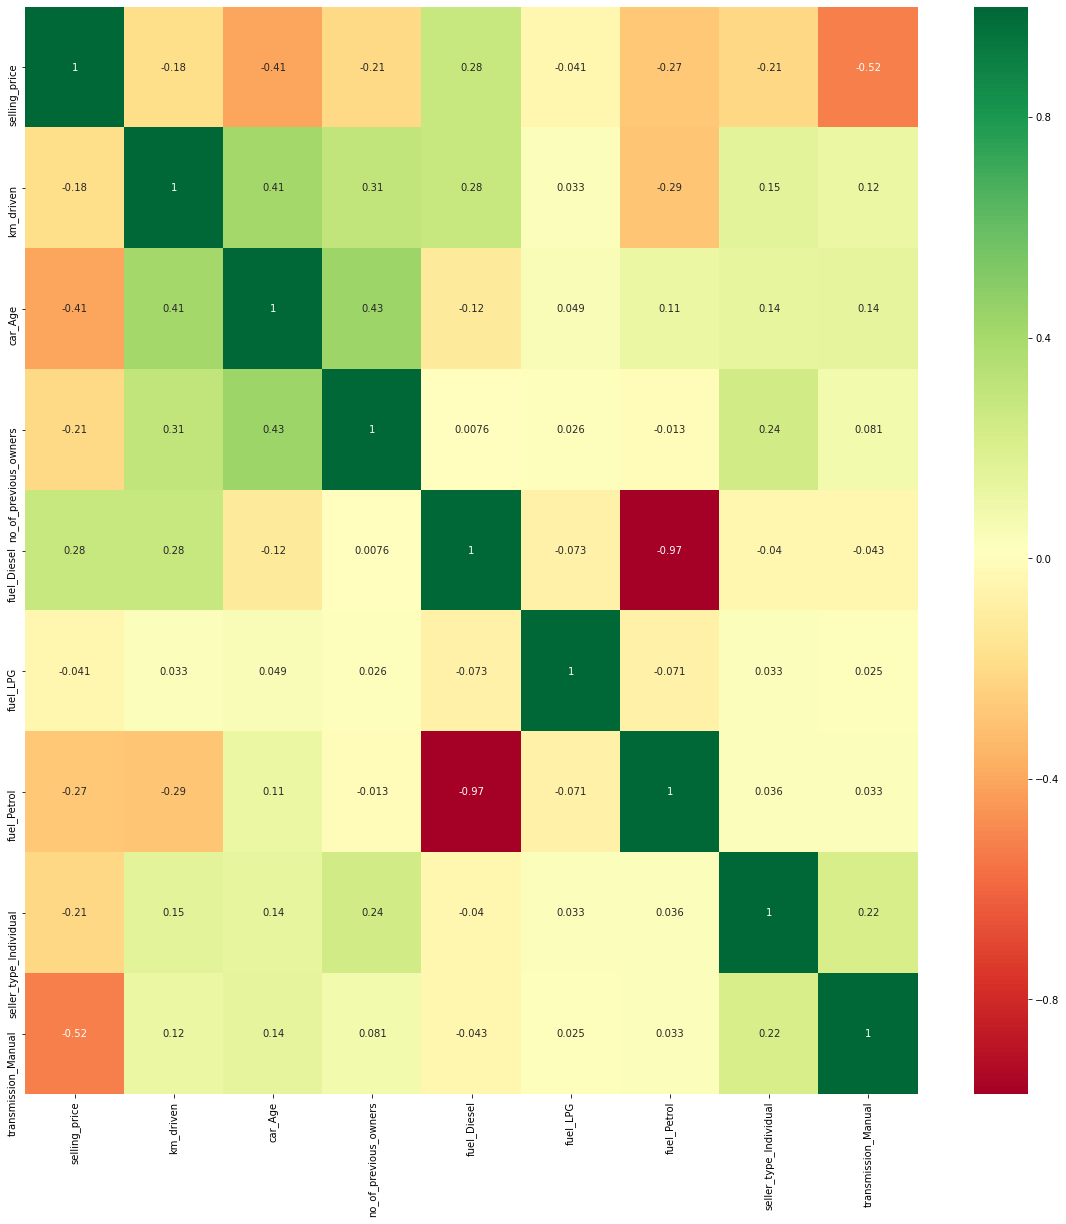

In [21]:
#checking the correlation between variables
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [22]:
#Independent and dependent variable(s)
X = final_dataset.drop("selling_price", axis=1)      #final_dataset.iloc[:,1:]
y = final_dataset[["selling_price"]]                 #final_dataset.iloc[:,0]

In [23]:
#feature importance

model = ExtraTreesRegressor()
model.fit(X,y)

c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

## Looking most important features

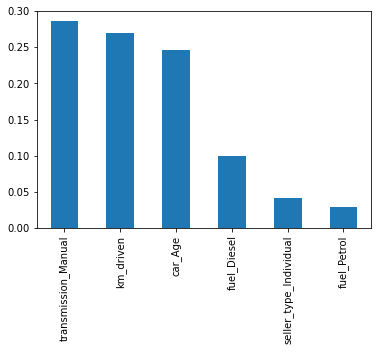

In [24]:
#plotting the graph of feature importance for better visualisation
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(6).plot(kind='bar')

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [26]:
len(X_train)

3311

## Creating hyperparameters for randomized search CV

In [27]:
#Randomized search CV for random forest

#Number of treers in random forest
n_estimators =[int(x) for x in np.linspace(100,1200,num = 12)]
#Number of features to consider at every split
max_features =["auto", "sqrt"]
#Maximum number of levels in the tree 
max_depth = [int(x) for x in np.linspace(5, 30,6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [28]:
#create the random forest grid
rf_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(rf_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
#Randomized search CV for gradient boosting
#Number of treers in random forest
n_estimators =[int(x) for x in np.linspace(100,1200,num = 12)]
#Learning rate
learning_rate = [0.01, 0.02, 0.05, 0.1, 0.2]
subsample = [0.05, 0.06, 0.08, 0.09, 0.1]
criterion = ['mse', 'rmse', 'friedman_mse']
#Number of features to consider at every split
max_features =["auto", "sqrt"]

In [30]:
#creating gradient boosting grid
gb_grid = {'n_estimators' : n_estimators,
           'learning_rate' : learning_rate,
           'subsample' : subsample,
           'max_depth' : max_depth,
           'max_features' : max_features}

## Trying Different Models

### Random Forest

In [31]:
#Use the random grid to search the best parameters
#Create the base model to tune
rf_model = RandomForestRegressor()

In [32]:
final_rf_model = RandomizedSearchCV(estimator = rf_model, 
                                 param_distributions=rf_grid,
                                 scoring='neg_mean_squared_error',
                                 n_iter = 10,
                                 cv = 5,
                                 verbose = 2,
                                 random_state = 42,
                                 n_jobs =1)

In [33]:
final_rf_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   1.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   2.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   2.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   3.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   3.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   2.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   5.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   5.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   5.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   5.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   4.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   7.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   9.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   7.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   9.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   8.6s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   5.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.8s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   4.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   4.7s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   5.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   4.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=   4.9s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.4min finished
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [34]:
final_rf_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [35]:
y_pred = final_rf_model.predict(X_test)

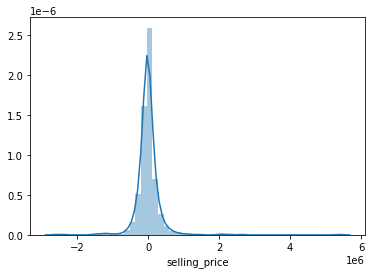

In [36]:
sns.distplot(y_test['selling_price']-y_pred)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 178071.1236017805
MSE: 138426888720.32108
RMSE: 372057.64166365546


### Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

In [39]:
final_gb_model = RandomizedSearchCV(estimator = gb_model, 
                                 param_distributions=gb_grid,
                                 scoring='neg_mean_squared_error',
                                 n_iter = 10,
                                 cv = 5,
                                 verbose = 2,
                                 random_state = 42,
                                 n_jobs =1)

In [40]:
final_gb_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   8.7s
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   7.6s
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   8.4s
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   7.8s
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   9.5s
[CV] subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2, total=   4.2s
[CV] subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2, total=   4.0s
[CV] subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2, total=   4.4s
[CV] subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2, total=   3.9s
[CV] subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2, total=   3.7s
[CV] subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02, total=   1.5s
[CV] subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02, total=   1.4s
[CV] subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02, total=   1.4s
[CV] subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02, total=   1.6s
[CV] subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=500, max_features=auto, max_depth=10, learning_rate=0.02, total=   1.6s
[CV] subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02, total=   2.9s
[CV] subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02, total=   3.1s
[CV] subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02, total=   2.9s
[CV] subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02, total=   2.9s
[CV] subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=700, max_features=sqrt, max_depth=25, learning_rate=0.02, total=   2.8s
[CV] subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02, total=   5.7s
[CV] subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02, total=   6.2s
[CV] subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02, total=   4.8s
[CV] subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02, total=   4.6s
[CV] subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=1100, max_features=auto, max_depth=20, learning_rate=0.02, total=   4.6s
[CV] subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02, total=   1.8s
[CV] subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02, total=   1.6s
[CV] subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02, total=   1.8s
[CV] subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02, total=   1.7s
[CV] subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.05, n_estimators=400, max_features=auto, max_depth=20, learning_rate=0.02, total=   1.8s
[CV] subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2, total=   2.4s
[CV] subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2, total=   2.0s
[CV] subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2, total=   2.7s
[CV] subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2, total=   1.9s
[CV] subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.08, n_estimators=700, max_features=sqrt, max_depth=10, learning_rate=0.2, total=   1.8s
[CV] subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05, total=   1.0s
[CV] subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05, total=   1.0s
[CV] subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05, total=   1.1s
[CV] subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05, total=   1.1s
[CV] subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.09, n_estimators=400, max_features=sqrt, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1, total=   0.4s
[CV] subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1, total=   0.4s
[CV] subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1, total=   0.4s
[CV] subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1, total=   0.4s
[CV] subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1, total=   0.4s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01, total=   2.9s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01, total=   2.8s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01, total=   3.1s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01, total=   2.8s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 


c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01, total=   2.9s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.5min finished
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\basit\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [41]:
final_gb_model.best_params_

{'subsample': 0.06,
 'n_estimators': 1000,
 'max_features': 'sqrt',
 'max_depth': 20,
 'learning_rate': 0.01}

In [42]:
y_pred = final_gb_model.predict(X_test)

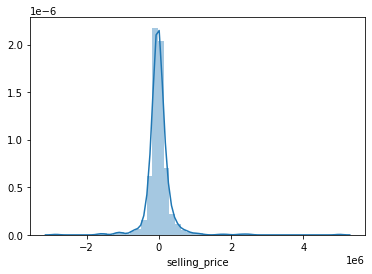

In [43]:
sns.distplot(y_test['selling_price']-y_pred)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 182279.9787734846
MSE: 134763125231.68608
RMSE: 367100.9741633575


## Conclusion

Gradient Boosting gives better RMSE than Random forest 

## Saving the model as pkl file

In [46]:
import pickle 
#creating/opening the file where we want to store our model 
file = open('model.pkl', 'wb')

#dump inofrmation into that file
pickle.dump(final_gb_model, file)